# Laporan Praktikum 2 Kelompok 5 Komnum (B)
|    NRP     |      Name      |
| :--------: | :------------: |
| 5025241148 | Muhammad Zaky Zein  |
| 5025221160 | Hartmann Kanisius Galla' Massang |
| 5025221199 | Isabella Sienna Sulisthio|
---
### Soal:
Salah satu kelemahan dari metode Trapezoidal adalah kita harus menggunakan jumlah interval yang besar untuk memperoleh akurasi yang diharapkan. Buatlah sebuah program komputer untuk menjelaskan bagaimana metode Integrasi Romberg dapat mengatasi kelemahan tersebut.

---

### Penyelesaian:
**Penjelasan Kode**:

Dalam kode integrasi romberg yang digunakan perlu menggunakan beberapa library bawaan dari python seperti `numpy`, `matplotlib.pyplot`, dan `tabulate`.

* `numpy`: digunakan untuk perhitungan numerik dalam Python.
* `matplotlib.pyplot`: digunakan untuk membuat grafik fungsi dari penyelesaian regula falsi yang dicari.
* `tabulate`: digunakan untuk menampilkan hasil iterasi dalam bentuk table dalam terminal

Dalam kode tersebut, didefinisikan sebuah fungsi f(x) yang bersifat _editable_ (bisa diedit oleh user sesuai kebutuhan perhitungan). Fungsi inilah yang nantinya akan dicari akar persamaannya menggunakan metode integrasi romberg. Contohnya pada kode di atas didefinisikan sebagai berikut.
```py
def fungsi(x):
    return np.exp(-x**2)

# parameter untuk integrasi romberg
batas_bawah = 0
batas_atas = 1
iterasi = 4 # n = 1, 2, 4, 8
nilai_sebenarnya = 0.74682413 # isi jika diketahui
```
Berarti kita ingin mencari penyelesaian persamaan f(x) = e^-x^2 dengan batas_atas = 1, batas_bawah = 0, dan iterasi = 4.

Selanjutnya dalam kode ini terdapat fungsi `integrasi_romberg(f, a, b, maks_iterasi=4)` yang merupakan fungsi utama kode program tersebut untuk menerapkan metode integrasi romberg dalam menemukan akar penyelesaian untuk f(x) yang diberikan, dan juga fungsi `metode_trapesium(f, a, b, n)` yang  berfungsi untuk mmenerapkan metode trapesium dalam menemukan akar penyelesaian untuk f(x) yang diberikan, dan untuk membandingkan akurasinya dengan integrasi romberg.

```py
# integral numerik dengan metode trapesium
def metode_trapesium(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    hasil = h / 2 * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return hasil

# integral numerik dengan metode Romberg
def integrasi_romberg(f, a, b, maks_iterasi=4):
    tabel_romberg = np.zeros((maks_iterasi, maks_iterasi))
    print("### Mengisi Kolom Pertama (Hasil Metode Trapesium) ###")
    for i in range(maks_iterasi):
        n = 2**i
        hasil_trapesium = metode_trapesium(f, a, b, n)
        tabel_romberg[i, 0] = hasil_trapesium
        print(f"Iterasi {i+1} [n={n}]: {hasil_trapesium:.8f}")
    for j in range(1, maks_iterasi):
        for i in range(j, maks_iterasi):
            ekstrapolasi = (4**j * tabel_romberg[i, j - 1] - tabel_romberg[i - 1, j - 1]) / (4**j - 1)
            tabel_romberg[i, j] = ekstrapolasi
    return tabel_romberg
```

Adapun rumus metode integrasi Romberg yang diimplementasikan dalam fungsi tersebut ialah:

![formula](https://miro.medium.com/v2/resize:fit:1384/1*pAYANBxJR4BPA5lww609GA.png)

Untuk penyesuaian dengan fungsi `integrasi_romberg`, parameter yang digunakan adalah sebagai berikut.
* f : fungsi yang akan dicari penyelesaiannya
* a : titik x0 (interval bawah)
* b : titik x1 (interval atas)
* maks_iterasi: batas maksimum iterasi pencarian akar

```py
tabel_romberg = np.zeros((maks_iterasi, maks_iterasi))
```
Membuat matriks nol berukuran maks_iterasi × maks_iterasi untuk menyimpan hasil trapesium (kolom 0) dan hasil ekstrapolasi (kolom 1…).

```py
for i in range(maks_iterasi):
    n = 2**i
    hasil_trapesium = metode_trapesium(f, a, b, n)
    tabel_romberg[i, 0] = hasil_trapesium
    print(f"Iterasi {i+1} [n={n}]: {hasil_trapesium:.8f}")
```

Pada iterasi ke-i, jumlah segmen trapesium n = 2**i. Lalu, hitung integral dengan metode_trapesium dan simpan di tabel_romberg[i,0], dan tampilkan hasil setiap iterasi.

```py
for j in range(1, maks_iterasi):
    for i in range(j, maks_iterasi):
        ekstrapolasi = (4**j * tabel_romberg[i, j - 1]
                        - tabel_romberg[i - 1, j - 1]) \
                       / (4**j - 1)
        tabel_romberg[i, j] = ekstrapolasi
        return tabel_romberg
```
Untuk setiap kolom j (mulai 1), dan baris i ≥ j, gunakan rumus integrasi romberg, dan simpan hasilnya di indeks i dan j pada tabel_romberg

Setelah itu, kita panggil fungsi dan cetak tabel lengkap:

```py
tabel_hasil = integrasi_romberg(fungsi, batas_bawah, batas_atas, iterasi)
```

Lalu kita membuat variabel Kolom_nama yang menyimpan header kolom—kolom pertama “Trapesium”, selanjutnya “Ekstrapolasi 1”, “Ekstrapolasi 2”, dan seterusnya sampai nilai iterasi - 1.

```py
print("\n### Tabel Integrasi Romberg Lengkap ###")
kolom_nama = ["Trapesium"]
for i in range(iterasi - 1):
    kolom_nama.append(f"Ekstrapolasi {i+1}")
```

variabel selanjutnya berfungsi untuk konversi setiap baris tabel_hasil menjadi list string dengan akurasi 8 nilai dibelakang koma.
```py
tabel_dalam_list = [
    [f"{val:.8f}" if val != 0 else "0" for val in row]
    for row in tabel_hasil
]
daftar_n = [f"n={2**i}" for i in range(iterasi)]
```
Setelah itu tabel ditampilkan menggunakan tabulate, dengan header mengambil nilai dari kolom_nama, index dari daftar_n, dan angka dengan akurasi 8 nilai dibelakang koma :

```py
print(
    tabulate(
        tabel_dalam_list,
        headers=kolom_nama,
        showindex=daftar_n,
        tablefmt="grid",
        floatfmt=".8f"
    )
)
```

Terakhir, memanggil fungsi plotting untuk memvisualisasikan area integrasi dan segmen trapesium:
```py
gambar_graph(a, b, step, offset):
```

Di mana (a) sebagai batas bawah dan batas atas (b) interval integrasi, lalu step sebagai jumlah titik untuk metode trapesium, (umumnya 2**(iterasi-1)+1). dan offset sebagai jarak tambahan di kiri dan kanan interval untuk memperjelas visualisasi area di luar batas integrasi. Penjelasan mengenai cara kerjanya dapat dilihat di sini :

```py
def gambar_graph(a, b, step, offset):
    # 1. Menyiapkan domain untuk plotting
    xint  = np.arange(a - offset, b + offset, 0.01)
    xtrap = np.linspace(a, b, step)

    # 2. Mengevaluasi fungsi f pada kedua domain
    yint  = fungsi(xint)   # nilai fungsi untuk kurva halus
    ytrap = fungsi(xtrap)  # nilai fungsi pada titik-titik trapesium

    # 3. Menggambar kurva fungsi asli (halus) dan titik trapesium
    plt.plot(xint, yint, label='f(x) asli')    # garis kontinu
    plt.plot(xtrap, ytrap, 'o-', label='Titik Trapesium')
    #   - 'o-': marker lingkaran dengan garis penghubung antar titik

    # 4. Mewarnai area di bawah kurva asli (integral sejati)
    plt.fill_between(
        xint, yint, 0,
        where=( (xint >= a) & (xint <= b) ),
        color="#00FF00", alpha=0.3,
        label='Area Integral'
    )
    # Penjelasan:
    #  - fill_between mensyaratkan x, y1, y2 (di sini y2=0)
    #  - kondisi where memastikan hanya area [a, b] yang diarsir
    #  - alpha = 0.3 memberikan transparansi 30%

    # 5. Mewarnai area di bawah titik trapesium (pendekatan)
    plt.fill_between(
        xtrap, ytrap, 0,
        where=( (xtrap >= a) & (xtrap <= b) ),
        color="#0000FF", alpha=0.2,
        label='Area Trapesium'
    )
    # Ini menampilkan persegi‐panjang/segitiga sesuai aturan trapesium

    # 6. Menggambar batas vertikal tiap segmen trapesium
    for xi, yi in zip(xtrap, ytrap):
        plt.vlines(
            xi, 0, yi,
            colors='black', linestyles='dotted', alpha=0.7
        )
    # Keterangan:
    #  - vlines(x, ymin, ymax) menggambar garis vertikal di x
    #  - linestyles='dotted' membuat garis titik-titik
    #  - alpha=0.7 memberi sedikit transparansi

    # 7. Menambahkan judul, label, dan legend
    plt.title('Grafik Integrasi f(x)', fontsize=16)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.legend(loc='best')   # menampilkan keterangan warna/marker

    # 8. Menampilkan plot
    plt.show()
```


Dengan demikian, didapatkan hasil gambar grafik seperti yang ditampilkan pada akhir laporan.

>>> Memulai Perhitungan Integrasi Romberg <<<

### Mengisi Kolom Pertama (Hasil Metode Trapesium) ###
Iterasi 1 [n=1]: 0.68393972
Iterasi 2 [n=2]: 0.73137025
Iterasi 3 [n=4]: 0.74298410
Iterasi 4 [n=8]: 0.74586561

### Tabel Integrasi Romberg Lengkap ###
+-----+-------------+------------------+------------------+------------------+
|     |   Trapesium |   Ekstrapolasi 1 |   Ekstrapolasi 2 |   Ekstrapolasi 3 |
+=====+=============+==================+==================+==================+
| n=1 |  0.68393972 |       0.00000000 |       0.00000000 |       0.00000000 |
+-----+-------------+------------------+------------------+------------------+
| n=2 |  0.73137025 |       0.74718043 |       0.00000000 |       0.00000000 |
+-----+-------------+------------------+------------------+------------------+
| n=4 |  0.74298410 |       0.74685538 |       0.74683371 |       0.00000000 |
+-----+-------------+------------------+------------------+------------------+
| n=8 |  0.74586561 |       0.7468

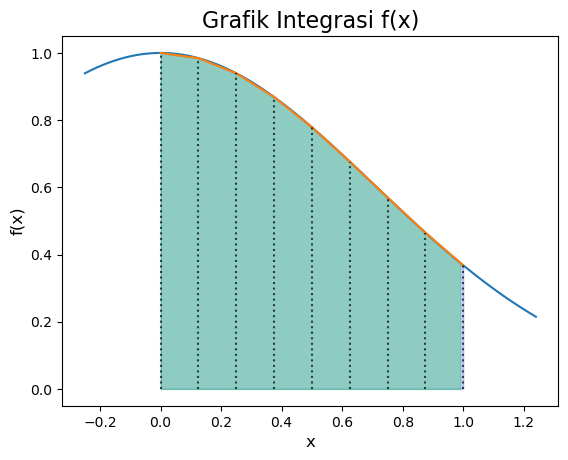

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# f(x), editable
def fungsi(x):
    return np.exp(-x**2)

# integral numerik dengan metode trapesium
def metode_trapesium(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    hasil = h / 2 * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return hasil

# integral numerik dengan metode Romberg
def integrasi_romberg(f, a, b, maks_iterasi=4):
    tabel_romberg = np.zeros((maks_iterasi, maks_iterasi))
    print("### Mengisi Kolom Pertama (Hasil Metode Trapesium) ###")
    for i in range(maks_iterasi):
        n = 2**i
        hasil_trapesium = metode_trapesium(f, a, b, n)
        tabel_romberg[i, 0] = hasil_trapesium
        print(f"Iterasi {i+1} [n={n}]: {hasil_trapesium:.8f}")
    for j in range(1, maks_iterasi):
        for i in range(j, maks_iterasi):
            ekstrapolasi = (4**j * tabel_romberg[i, j - 1] - tabel_romberg[i - 1, j - 1]) / (4**j - 1)
            tabel_romberg[i, j] = ekstrapolasi
    return tabel_romberg

# gambar graph
def gambar_graph(a, b, step, offset):
    xint = np.arange(a-offset, b+offset, 0.01)
    xtrap = np.linspace(a, b, step)
    yint = fungsi(xint)
    ytrap = fungsi(xtrap)
    plt.plot(xint, yint)
    plt.plot(xtrap, ytrap)
    plt.fill_between(xint, yint, 0, where=((xint>=a) & (xint<=b)), color="#00FF00", alpha=0.3)
    plt.fill_between(xtrap, ytrap, 0, where=((xtrap>=a) & (xtrap<=b)), color="#0000FF", alpha=0.2)
    for xi, yi in zip(xtrap, ytrap):
        plt.vlines(xi, 0, yi, colors='black', linestyles='dotted', alpha=0.7)
    plt.title('Grafik Integrasi f(x)', fontsize=16)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.show()


# contoh penggunaan, editable
batas_bawah = 0
batas_atas = 1
iterasi = 4 # n = 1, 2, 4, 8
nilai_sebenarnya = 0.74682413 # isi jika diketahui

print(">>> Memulai Perhitungan Integrasi Romberg <<<\n")
tabel_hasil = integrasi_romberg(fungsi, batas_bawah, batas_atas, iterasi)

# output tabel integrasi Romberg dengan library tabulate
print("\n### Tabel Integrasi Romberg Lengkap ###")
kolom_nama = ["Trapesium"]
for i in range(iterasi - 1):
    kolom_nama.append(f"Ekstrapolasi {i+1}")
tabel_dalam_list = [[f"{val:.8f}" if val != 0 else "0" for val in row] for row in tabel_hasil]
daftar_n = [f"n={2**i}" for i in range(iterasi)]
print(tabulate(tabel_dalam_list, headers=kolom_nama, showindex=daftar_n, tablefmt="grid", floatfmt=".8f"))

hasil_trapesium_terbaik = tabel_hasil[-1, 0]
hasil_romberg_terbaik = tabel_hasil[-1, -1]

error_trapesium = abs(hasil_trapesium_terbaik - nilai_sebenarnya)
error_romberg = abs(hasil_romberg_terbaik - nilai_sebenarnya)

# perbandingan hasil
print("\n### Perbandingan Akurasi ###")
print(f"Nilai Sebenarnya\t\t: {nilai_sebenarnya:.8f}")
print(f"Hasil Trapesium\t[n=8]\t\t: {hasil_trapesium_terbaik:.8f} (Error: {error_trapesium:.8e})")
print(f"Hasil Romberg\t[paling akurat]\t: {hasil_romberg_terbaik:.8f} (Error: {error_romberg:.8e})")

# kesimpulan
print("\n Kesimpulan : \nMetode Romberg, teknik integrasi numerik, umumnya lebih unggul daripada aturan\ntrapesium dasar karena memanfaatkan ekstrapolasi Richardson untuk mengurangi\n'true error' dan mencapai akurasi yang lebih tinggi.")

# graph
gambar_graph(batas_bawah, batas_atas, 2**(iterasi-1)+1, 0.25)
